##  Model - Man and Woman Recognition
***Created by: Muhammad Saleem Raza***

### Importing Libraries

In [1]:
import cv2
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Dropout, Flatten

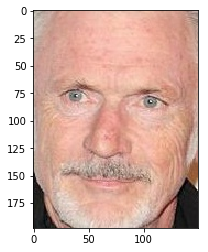

In [2]:
man = cv2.imread('../datasets/male_female/train/man/face_1010.jpg')
man = cv2.cvtColor(man, cv2.COLOR_BGR2RGB)
plt.imshow(man)

### Data Augmentation

In [4]:
img_gen = ImageDataGenerator(
                            rotation_range=30,
                            width_shift_range=0.1,
                            height_shift_range=0.1,
                            shear_range=0.2,
                            zoom_range=0.2,
                            fill_mode='nearest',
                            horizontal_flip=True,
                            rescale=1/255)

### Image Data For Training and Testing

In [6]:
train_gen = img_gen.flow_from_directory('../datasets/male_female/train/',
                                        target_size=input_shape[:2],
                                        batch_size=batch_size,
                                        class_mode='binary')

Found 1597 images belonging to 2 classes.


In [7]:
test_gen = img_gen.flow_from_directory('../datasets/male_female/test/',
                                        target_size=input_shape[:2],
                                        batch_size=batch_size,
                                        class_mode='binary')

Found 340 images belonging to 2 classes.


In [8]:
valid_gen = img_gen.flow_from_directory('../datasets/male_female/valid/',
                                        target_size=input_shape[:2],
                                        batch_size=batch_size,
                                        class_mode='binary')

Found 338 images belonging to 2 classes.


### Type of Classes

In [9]:
train_gen.class_indices

{'man': 0, 'woman': 1}

### Loading Saved Model

### Testing on a Particular Image

In [3]:
input_shape = (100, 100, 3)
batch_size = 128

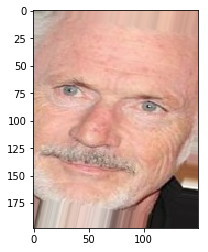

In [5]:
plt.imshow(img_gen.random_transform(man))

###  Network of CNN

In [10]:
model = Sequential()

model.add(Conv2D(filters=32, kernel_size=(3,3), input_shape=input_shape, activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
          
model.add(Conv2D(filters=64, kernel_size=(3,3), input_shape=input_shape, activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
          
model.add(Conv2D(filters=64, kernel_size=(3,3), input_shape=input_shape, activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
          
model.add(Flatten())
          
model.add(Dense(128, activation='relu'))
          
model.add(Dropout(0.5))
          
model.add(Dense(1, activation='sigmoid'))

In [11]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 98, 98, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 49, 49, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 47, 47, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 23, 23, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 21, 21, 64)        36928     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 10, 10, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 6400)              0

### Compiling Network CNN

In [12]:
model.compile(loss='binary_crossentropy',
             optimizer='adam',
             metrics=['acc'])

### Model Training

In [13]:
result = model.fit_generator(train_gen, epochs=10, steps_per_epoch=50, validation_data=valid_gen, validation_steps=10)

Epoch 1/10
50/50 [==============================] - 166s 3s/step - loss: 0.6624 - acc: 0.5988 - val_loss: 0.5477 - val_acc: 0.7303
Epoch 2/10
50/50 [==============================] - 166s 3s/step - loss: 0.4360 - acc: 0.8010 - val_loss: 0.4234 - val_acc: 0.8310
Epoch 3/10
50/50 [==============================] - 165s 3s/step - loss: 0.3380 - acc: 0.8501 - val_loss: 0.3595 - val_acc: 0.8345
Epoch 4/10
50/50 [==============================] - 165s 3s/step - loss: 0.3089 - acc: 0.8681 - val_loss: 0.3743 - val_acc: 0.8327
Epoch 5/10
50/50 [==============================] - 166s 3s/step - loss: 0.2682 - acc: 0.8837 - val_loss: 0.4076 - val_acc: 0.8327
Epoch 6/10
50/50 [==============================] - 163s 3s/step - loss: 0.2575 - acc: 0.8933 - val_loss: 0.3240 - val_acc: 0.8616
Epoch 7/10
50/50 [==============================] - 163s 3s/step - loss: 0.2325 - acc: 0.9026 - val_loss: 0.3074 - val_acc: 0.8538
Epoch 8/10
50/50 [==============================] - 167s 3s/step - loss: 0.2327 - a

### Graph For Training and Validation (Accuracy and Loss)

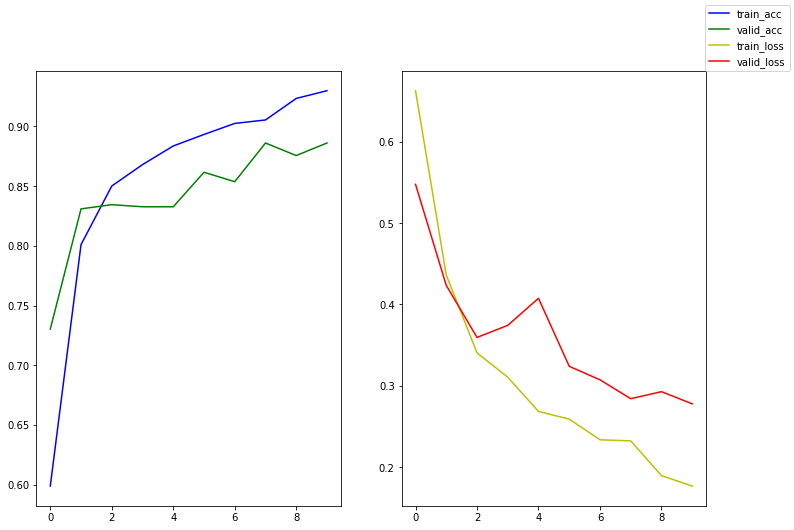

In [14]:
fig = plt.figure(figsize=(12,8))

ax = fig.add_subplot(121)
ax.plot(result.history['acc'], color='b', label='train_acc')
ax.plot(result.history['val_acc'], color='g', label='valid_acc')

ax2 = fig.add_subplot(122)
ax2.plot(result.history['loss'], color='y', label='train_loss')
ax2.plot(result.history['val_loss'], color='r', label='valid_loss')

fig.legend()

### Saving Model

In [3]:
model.save('model_male_female.h5')
model.save_weights('weight_model_male_female_.h5')

In [16]:
model.metrics_names

['loss', 'acc']

In [17]:
eva = model.evaluate_generator(test_gen)

In [18]:
print('Test loss:', eva[0])
print('Test acc:', eva[1])

Test loss: 0.22755971550941467
Test acc: 0.89705884


In [19]:
mw_model = load_model('male_female_model.h5')

(100, 100, 3)
(1, 100, 100, 3)


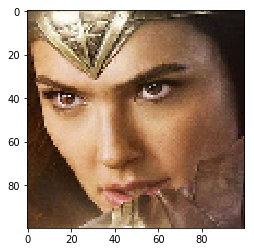

In [20]:
from tensorflow.keras.preprocessing.image import load_img, img_to_array

woman_file = '../datasets/male_female/test/woman/face_101.jpg'

woman_img = load_img(woman_file, target_size=input_shape[:2])

plt.imshow(woman_img)

woman_img = img_to_array(woman_img)

print(woman_img.shape)

woman_img = np.expand_dims(woman_img, axis=0)

woman_img /= 255

print(woman_img.shape)

In [21]:
train_gen.class_indices

{'man': 0, 'woman': 1}

In [22]:
model.predict_classes(woman_img)

array([[0]])

In [23]:
### Own evalute functions

In [24]:
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import os

woman_true = 0
total_woman = 0
for x in range(190):
    
    if os.path.exists('../datasets/male_female/test/man/face_'+str(x)+'.jpg'):

        woman_file = '../datasets/male_female/test/man/face_'+str(x)+'.jpg'
        
        total_woman += 1
        
        woman_img = load_img(woman_file, target_size=input_shape[:2])

        woman_img = img_to_array(woman_img)

        woman_img = np.expand_dims(woman_img, axis=0)

        woman_img /= 255

        if model.predict_classes(woman_img)[0][0] == train_gen.class_indices['man']:
            woman_true += 1

print("total_woman:", total_woman)            
print('woman_true:', woman_true)
print('acc:', (woman_true / total_woman) * 100)
print('loss:',  (1 - (woman_true / total_woman)) * 100)

total_woman: 170
woman_true: 160
acc: 94.11764705882352
loss: 5.882352941176472
